In [2]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# 🎯 Load Dataset
df = pd.read_csv('healthcare_dataset.csv')

# 📈 Use only the last 1000 rows
df = df.tail(1000)

# 📈 Show first few rows
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
9000,Ryan Perez,63,Male,A+,Hypertension,2020-02-21,Amanda Vasquez,"Arnold, Brown and Williams",Cigna,18055.322911,217,Urgent,2020-03-21,Aspirin,Abnormal
9001,Alexander Steele,85,Male,B-,Hypertension,2022-10-12,Michelle Grant,White and Sons,UnitedHealthcare,25216.236317,246,Elective,2022-10-28,Penicillin,Abnormal
9002,Andre White,49,Female,A-,Diabetes,2021-02-22,Douglas Brooks,Harvey-Rivera,Blue Cross,14059.115889,248,Emergency,2021-03-12,Aspirin,Inconclusive
9003,Patrick Vargas,26,Male,B-,Obesity,2022-05-08,Dr. Donna Stevens,"Johnson, Krause and Harris",Blue Cross,29362.314410,347,Urgent,2022-05-14,Aspirin,Abnormal
9004,John Cole,55,Male,O+,Obesity,2020-09-06,Mark Bowman,Griffin-Barr,Aetna,15749.302925,221,Urgent,2020-10-02,Lipitor,Inconclusive


# Pie Chart using Matplotlib
### Blood Type Distribution

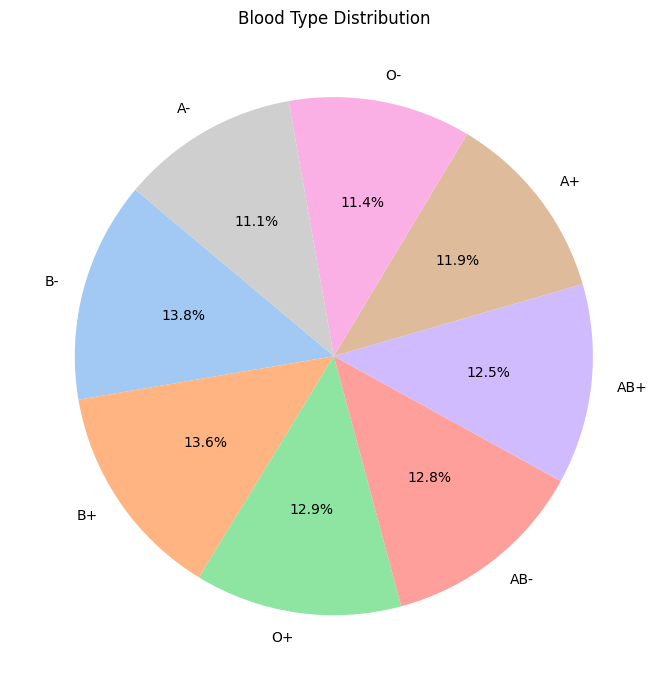

In [11]:
plt.figure(figsize=(7, 7))
blood_counts = df['Blood Type'].value_counts()
plt.pie(blood_counts, labels=blood_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Blood Type Distribution')
plt.tight_layout()
plt.show()

# Barchart using Seaborn
### Total Billing Amount Per Hospital

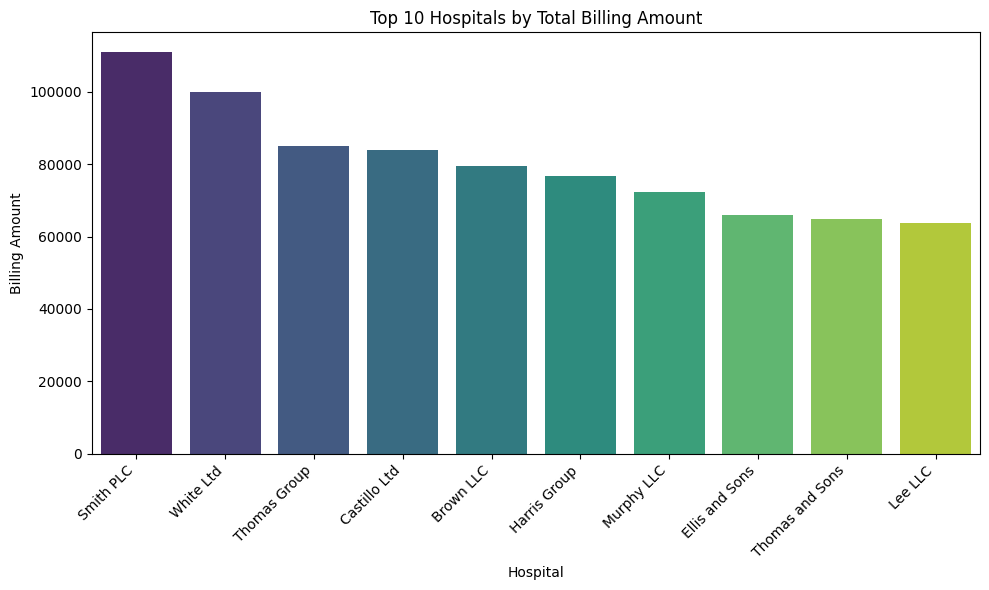

In [15]:
# Step 1: Group by hospital and sum billing amounts
hospital_billing = df.groupby('Hospital')['Billing Amount'].sum().reset_index()

# Step 2: Sort the hospitals by billing amount
hospital_billing = hospital_billing.sort_values(by='Billing Amount', ascending=False)

# Step 3: Take only top 10 hospitals
top_hospitals = hospital_billing.head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Hospital', y='Billing Amount', data=top_hospitals, palette='viridis')
plt.title('Top 10 Hospitals by Total Billing Amount')
plt.xticks(rotation=45, ha='right')  # ha='right' makes labels tilt nicely
plt.tight_layout()
plt.show()


# Line Chart using Plotly Express
### Billing Amount Over Time

In [16]:
# Convert 'Date of Admission' to datetime
sdf = df.tail(100)
sdf['Date of Admission'] = pd.to_datetime(sdf['Date of Admission'])

# Sort by Date
sdf_sorted = sdf.sort_values('Date of Admission')

# Line Chart
fig = px.line(
    sdf_sorted, 
    x='Date of Admission', 
    y='Billing Amount', 
    title='Billing Amount Over Time',
    markers=True
)
fig.show()


# COMPARATIVE CHART (Using Altair)  
### Avg Billing by Admission Type

In [6]:
# 🎯 COMPARATIVE Chart using Altair
chart = alt.Chart(df).mark_bar().encode(
    x='Admission Type:N',
    y='mean(Billing Amount):Q',
    color='Admission Type:N'
).properties(title='Average Billing Amount by Admission Type')
chart.show()


alt.Chart(...)

# 3D SCATTER PLOT (Using Plotly Express) 
### Age, Billing, Test Results

In [9]:
import plotly.express as px
import plotly.io as pio

# 👇 ADD THIS
pio.renderers.default = 'notebook_connected'  # Or use 'browser' if needed

fig = px.scatter_3d(df, x='Age', y='Billing Amount', z='Test Results', color='Gender')
fig.show()


# Swarm Plot using Matplotlib
### Age distribution by Medical condition

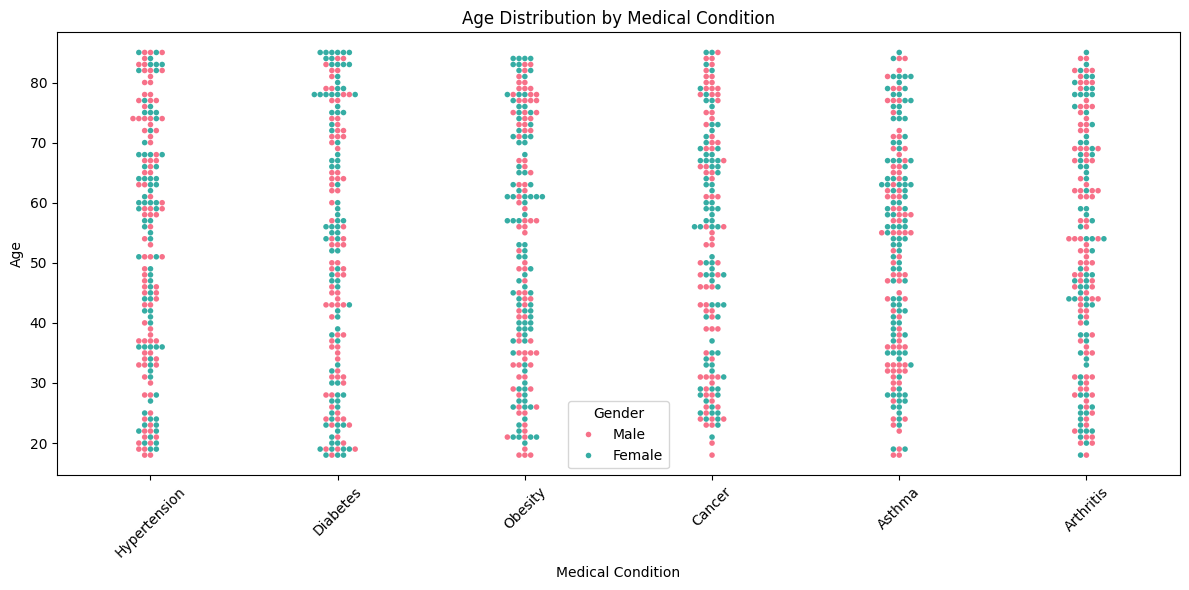

In [14]:
# 10. Swarm Plot of Age by Medical Condition
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Medical Condition', y='Age', data=df, hue='Gender', palette='husl', size=4)
plt.title('Age Distribution by Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()